# 📋 Jupyter Notebook Quick Shortcuts (Markdown cell)
# Press 'H' in command mode to view all shortcuts
# 
# **Command Mode** (press Esc to enter):
# - A: Insert cell above
# - B: Insert cell below
# - D D: Delete current cell
# - Z: Undo delete
# - M: Change cell to Markdown
# - Y: Change cell to Code
# - Shift + Enter: Run cell and go to next
# - Ctrl + Enter: Run cell (stay on it)
#
# **Edit Mode** (press Enter to enter):
# - Tab: Auto-complete
# - Shift + Tab: Show function hint
# - Ctrl + /: Comment/uncomment line


In [19]:
import pandas as pd

column_names = [
    "age",         # tuổi
    "sex",         # giới tính (1 = nam, 0 = nữ)
    "cp",          # loại đau ngực
    "trestbps",    # huyết áp khi nghỉ
    "chol",        # cholesterol
    "fbs",         # đường huyết lúc đói > 120 mg/dl (1/0)
    "restecg",     # kết quả ECG lúc nghỉ
    "thalach",     # nhịp tim tối đa đạt được
    "exang",       # đau thắt ngực do gắng sức (1/0)
    "oldpeak",     # ST chênh so với nghỉ
    "slope",       # độ dốc đoạn ST
    "ca",          # số lượng mạch chính được nhuộm màu (0–3)
    "thal",        # kết quả thallium test (3 = bình thường, 6 = lỗi cố định, 7 = lỗi có thể phục hồi)
    "target"       # nhãn kết quả (0 = không bệnh, 1-4 = có bệnh)
]


df = pd.read_csv("Data/heart+disease/processed.cleveland.data", names=column_names, na_values='?')
# target > 0 thành 1 vì chỉ phân biệt có bệnh hay không
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# in dữ liệu bị thiếu ban đầu
df.isna().sum()
# điền dữ liệu bị thiếu, chỉ có 2 attribute: ca và thal là thiếu 
df["ca"] = df["ca"].fillna(df["ca"].median())
df["thal"] = df["thal"].fillna(df["thal"].mode()[0]) 
# sau khi điền dữ liệu bị thiếu
df.isna().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
# drop bỏ cái cột target
X = df.drop("target", axis=1)
# bảng mỗi cột target
y = df["target"]




from sklearn.model_selection import train_test_split

split_ratios = [0.4, 0.6, 0.8, 0.9]
datasets = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=1-ratio,
        stratify=y,
        random_state=42
    )
    # lưu dữ liệu vào data set
    # ví dụ  0.4_0.6 là tỉ lệ 40% train và 60% test
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    # cộng với 0.001 để tránh làm tròn xuống =))
    datasets[f"feature_train_{key}"] = X_train
    datasets[f"label_train_{key}"] = y_train
    datasets[f"feature_test_{key}"] = X_test
    datasets[f"label_test_{key}"] = y_test

#lưu vào file csv
# for key, value in datasets.items():
#     value.to_csv(f"{key}.csv", index=False)
print(datasets.keys())



dict_keys(['feature_train_40_60', 'label_train_40_60', 'feature_test_40_60', 'label_test_40_60', 'feature_train_60_40', 'label_train_60_40', 'feature_test_60_40', 'label_test_60_40', 'feature_train_80_20', 'label_train_80_20', 'feature_test_80_20', 'label_test_80_20', 'feature_train_90_10', 'label_train_90_10', 'feature_test_90_10', 'label_test_90_10'])


In [21]:
# import matplotlib.pyplot as plt

# def plot_distribution(y, title):
#     # đếm số lượng các nhãn trong y 0 và 1
#     counts = y.value_counts().sort_index()
#     labels = counts.index
#     values = counts.values

#     plt.bar(labels, values)                # Vẽ biểu đồ cột
#     plt.title(title)                       # Tiêu đề biểu đồ
#     plt.xlabel("Target")                   # Nhãn trục X
#     plt.ylabel("Count")                    # Nhãn trục Y
#     plt.xticks([0, 1])                     # Đảm bảo trục X chỉ có 0 và 1
#     plt.show()                             # Hiển thị biểu đồ



# #vẽ cho toàn bộ dữ liệu
# plot_distribution(y, "Full Dataset")

# #vẽ cho từng tập train/test
# for ratio in split_ratios:
#     key = f"{int(ratio*100)}_{int((1-ratio)*100)}"
#     plot_distribution(datasets[f"label_train_{key}"], f"Train {key}")
#     plot_distribution(datasets[f"label_test_{key}"], f"Test {key}")


In [16]:
from sklearn.tree import DecisionTreeClassifier

#thu voi tap 80% train va 20% test
X_train = datasets["feature_train_80_20"]
y_train = datasets["label_train_80_20"]

#huan liyenliyen
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

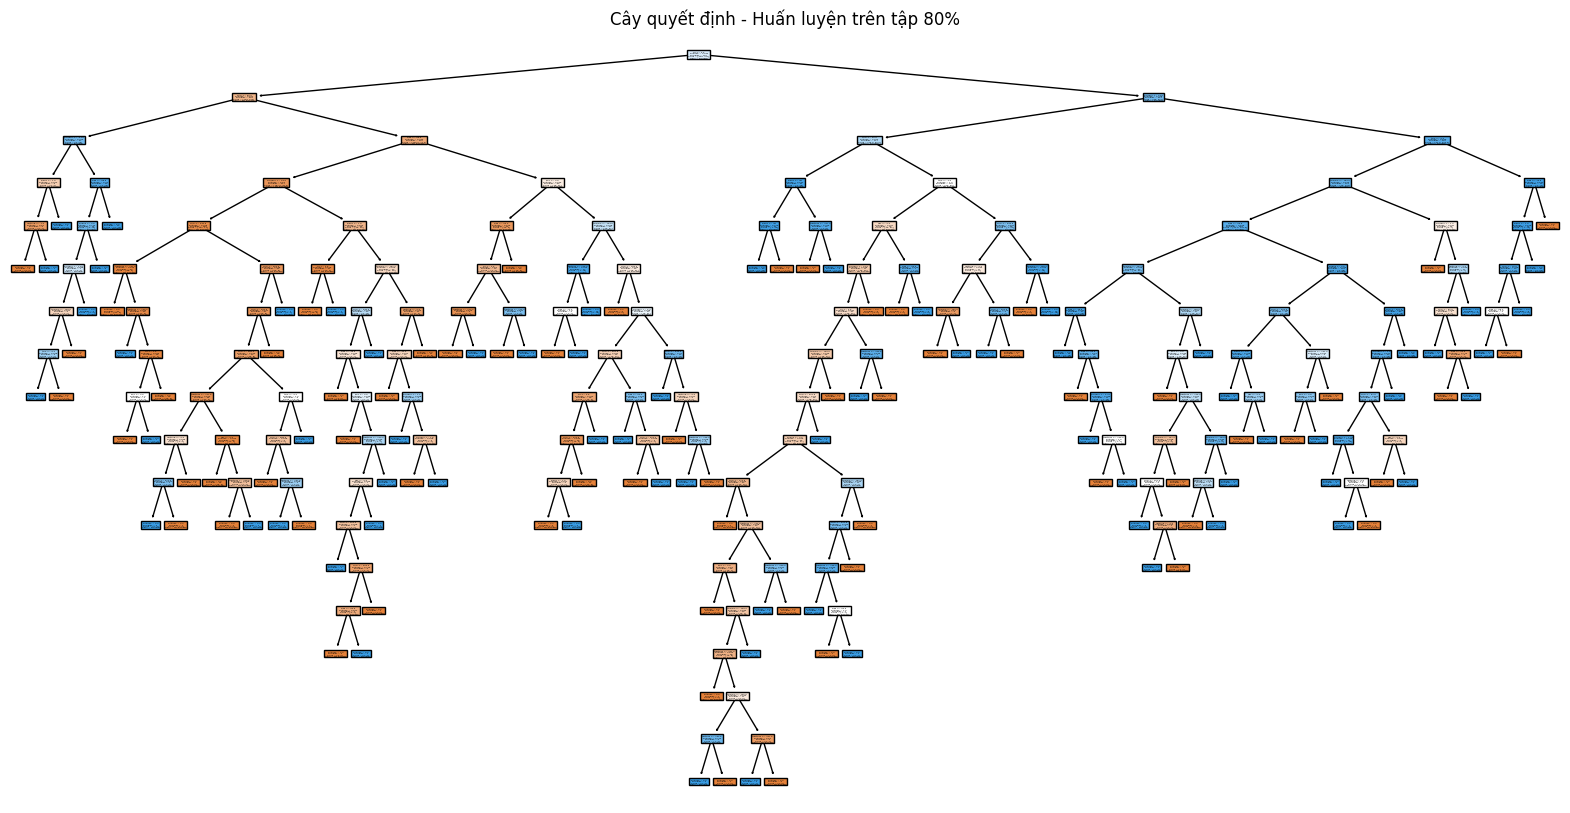

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["No Disease", "Disease"])
plt.title("Cây quyết định - Huấn luyện trên tập 80%")
plt.show()


In [35]:
# Lấy lại tập test tương ứng với mô hình đã train (80/20)
X_test = datasets["feature_test_80_20"]
y_test = datasets["label_test_80_20"]

# Dự đoán
y_pred = clf.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))



📊 Confusion Matrix:
[[51 31]
 [24 78]]

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.68      0.62      0.65        82
     Disease       0.72      0.76      0.74       102

    accuracy                           0.70       184
   macro avg       0.70      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184


✅ Accuracy Score: 0.7010869565217391
